<a href="https://colab.research.google.com/github/almiraturan/mini_farm_game/blob/main/teshis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Verileri tablo yapmak için
import numpy as np  # Matematiksel hesaplar için
from sklearn.datasets import load_breast_cancer # Hazır veri setimiz
from sklearn.model_selection import train_test_split # Veriyi bölmek için
from sklearn.preprocessing import StandardScaler # Ölçekleme için
from sklearn.ensemble import RandomForestClassifier # Yapay zeka modelimiz
from sklearn.metrics import classification_report, confusion_matrix # Başarı ölçümü için

print("1. Adım Tamam: Kütüphaneler yüklendi!")

1. Adım Tamam: Kütüphaneler yüklendi!


In [2]:
# Veriyi kütüphaneden çekiyoruz
veri_paketi = load_breast_cancer()

# Veriyi bir tablo (DataFrame) haline getirelim
df = pd.DataFrame(veri_paketi.data, columns=veri_paketi.feature_names)

# Tahmin edeceğimiz hedef sonucu ekleyelim (0: Patojenik/Kötü, 1: Benign/İyi)
df['hedef'] = veri_paketi.target

print("2. Adım Tamam: Veri seti yüklendi. İşte ilk 5 satır:")
df.head()

2. Adım Tamam: Veri seti yüklendi. İşte ilk 5 satır:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,hedef
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# X: Hücre özellikleri (varyant profilleri), y: Sonuç (patojenik mi?)
X = df.drop('hedef', axis=1)
y = df['hedef']

# Verinin %80'i ile öğreteceğiz, %20'si ile sınav yapacağız
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"3. Adım Tamam: {len(X_train)} örnek eğitim, {len(X_test)} örnek test için ayrıldı.")


3. Adım Tamam: 455 örnek eğitim, 114 örnek test için ayrıldı.


In [4]:
scaler = StandardScaler()

# Eğitim verisine göre teraziyi ayarla ve sayıları dönüştür
X_train_olcekli = scaler.fit_transform(X_train)

# Test verisini de aynı teraziyle dönüştür (yeni bir ayar yapma, olanı kullan)
X_test_olcekli = scaler.transform(X_test)

print("4. Adım Tamam: Tüm sayılar birbirine eşitlendi (Ölçekleme yapıldı)!")

4. Adım Tamam: Tüm sayılar birbirine eşitlendi (Ölçekleme yapıldı)!


In [5]:
# Modelimizi (RandomForest) tanımlayalım
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Yapay zekaya "Hadi bu verileri öğren" diyoruz
model.fit(X_train_olcekli, y_train)

print("5. Adım Tamam: Model eğitimi bitti. Yapay zeka şu an bir şeyler biliyor!")

5. Adım Tamam: Model eğitimi bitti. Yapay zeka şu an bir şeyler biliyor!


In [6]:
# Yapay zekaya görmediği sınav sorularını (test verisini) soruyoruz
tahminler = model.predict(X_test_olcekli)

# Sonuçları raporlayalım
print("--- Performans Raporu ---")
print(classification_report(y_test, tahminler))

# Karmaşıklık Matrisi (Kaçını doğru bildi, kaçını kaçırdı?)
print("--- Karmaşıklık Matrisi ---")
print(confusion_matrix(y_test, tahminler))

--- Performans Raporu ---
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

--- Karmaşıklık Matrisi ---
[[40  3]
 [ 1 70]]


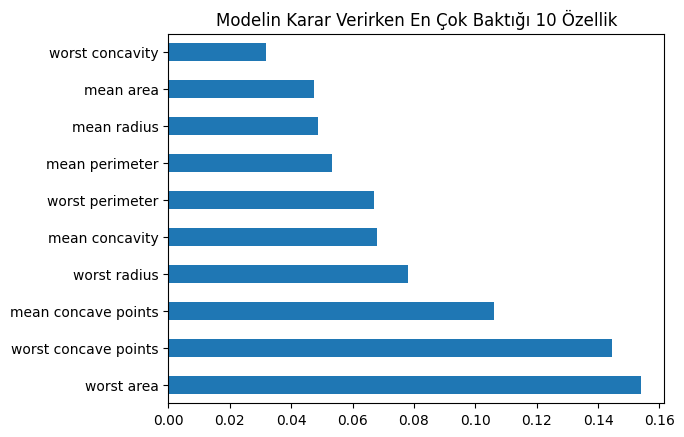

In [7]:
import matplotlib.pyplot as plt

# Hangi özellik daha önemliymiş görselleştirelim
onemli_ozellikler = pd.Series(model.feature_importances_, index=veri_paketi.feature_names)
onemli_ozellikler.nlargest(10).plot(kind='barh')
plt.title("Modelin Karar Verirken En Çok Baktığı 10 Özellik")
plt.show()